# K-means, 샘플데이터
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비
- 샘플 만들어서 사용

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  centers=3,
                  n_features=2,
                  cluster_std=0.5,
                  random_state=0)

In [5]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [8]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

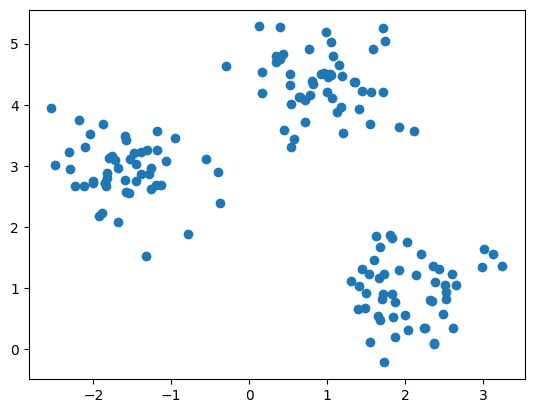

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## 학습

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            random_state=2022)
km.fit(X) #학습
# 비지도학습이므로 y는 넣지 않는다

KMeans(n_clusters=3, random_state=2022)

In [48]:
type(X)

numpy.ndarray

In [11]:
y_pred = km.predict(X)

In [12]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [15]:
df = pd.DataFrame(X,columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [16]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


In [21]:
centroid = km.cluster_centers_
centroid

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

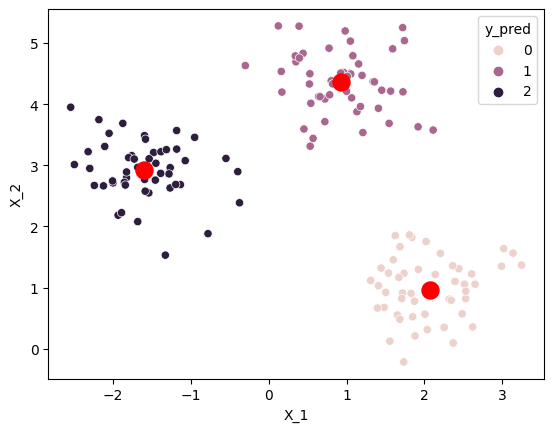

In [24]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
           s=150, marker='o', c='red')

## elbow method

In [25]:
inertia = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(X)
    inertia.append(km.inertia_)
    # km.inertia_
    
inertia

[283.46101780209307,
 72.47601670996698,
 62.84061768542222,
 54.29757489773776,
 47.85292137212694,
 39.88978825654857,
 35.70304272594484,
 30.624470574346063,
 26.97109816223398]

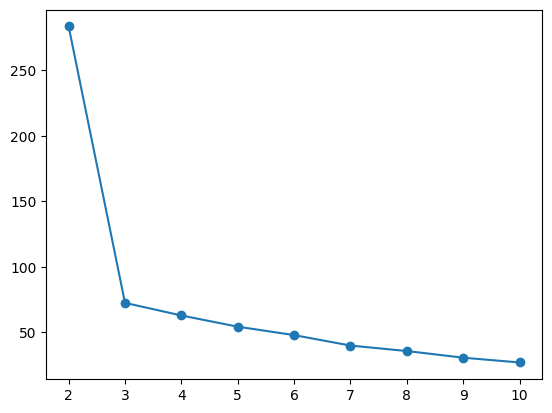

In [31]:
plt.plot(range(2,11),inertia, marker='o')

elbow는 3

---

## iris data를 사용해서 Kmeans

In [35]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
X = df.iloc[:,:2]

In [76]:
X_np = np.array(X)

In [77]:
km = KMeans(n_clusters=3,
            random_state=2022)
km.fit(X) #학습

KMeans(n_clusters=3, random_state=2022)

In [83]:
y_pred = km.predict(X_np)

C:\Users\006\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [85]:
X['y_pred'] = y_pred

C:\Users\006\AppData\Local\Temp\ipykernel_13356\2659293268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y_pred'] = y_pred


In [79]:
centroid = km.cluster_centers_
centroid

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [80]:
X_1=X_np[:,0]
X_2=X_np[:,1]

In [86]:
X

,sepal length (cm),sepal width (cm),y_pred
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,0
147,6.5,3.0,2
148,6.2,3.4,2


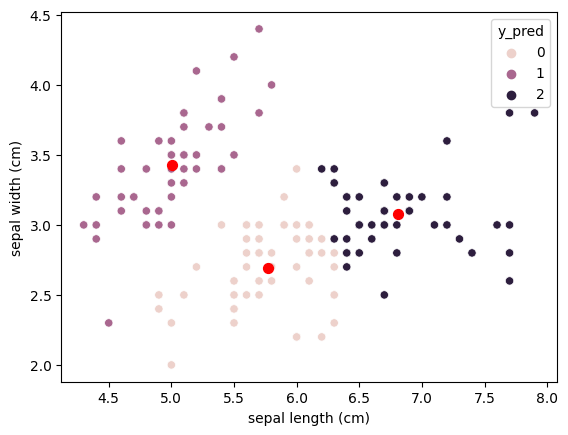

In [88]:
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
           s=50, marker='o', c='red')